In [16]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Q1
a) Plot function

[0.         0.09828658 0.18991231 0.27511089 0.35411605 0.42716149
 0.49448094 0.55630809 0.61287668 0.66442041 0.711173   0.75336816
 0.79123961 0.82502106 0.85494622 0.88124881 0.90416255 0.92392114
 0.94075831 0.95490776 0.96660321 0.97607837 0.98356697 0.9893027
 0.9935193  0.99645046 0.99832992 0.99939137 0.99986854 0.99999513
 1.00000487 1.00013146 1.00060863 1.00167008 1.00354954 1.0064807
 1.0106973  1.01643303 1.02392163 1.03339679 1.04509224 1.05924169
 1.07607886 1.09583745 1.11875119 1.14505378 1.17497894 1.20876039
 1.24663184 1.288827   1.33557959 1.38712332 1.44369191 1.50551906
 1.57283851 1.64588395 1.72488911 1.81008769 1.90171342 2.        ]


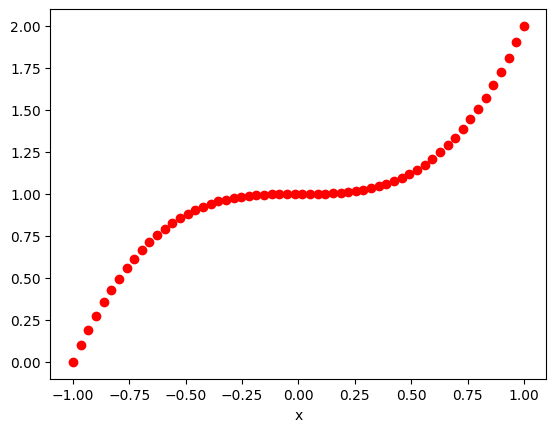

In [2]:
X = np.linspace(-1, 1, 60)
y = X ** 3 + 1

#observe the numpy array
print(y)

plt.scatter(X, y, color='red')
plt.xlabel('x')

plt.show()

Q1 b) Take a training set and introduce noise

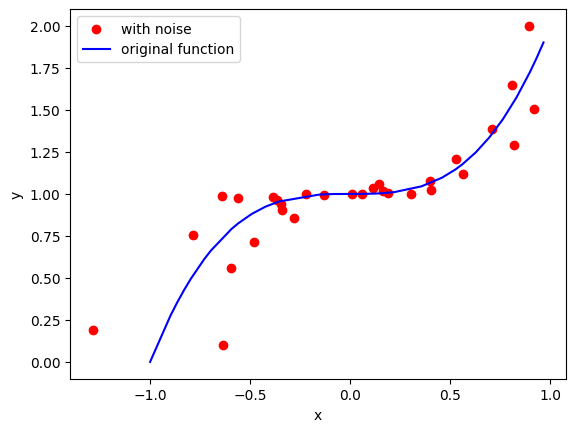

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)
random_noise_x = (np.random.random_sample((30,)) - np.random.random_sample((30,))) / 2
# print(X_train)
X_train = X_train + random_noise_x

#sort the test data so that we can plot it
X_test_sorted = np.sort(X_test)
y_test_sorted = X_test_sorted ** 3 + 1  

plt.scatter(X_train, y_train, color='red', label="with noise")
plt.plot(X_test_sorted, y_test_sorted, color='blue', label="original function")
plt.title("original function but test data with noise")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

c) perform a linear regression 

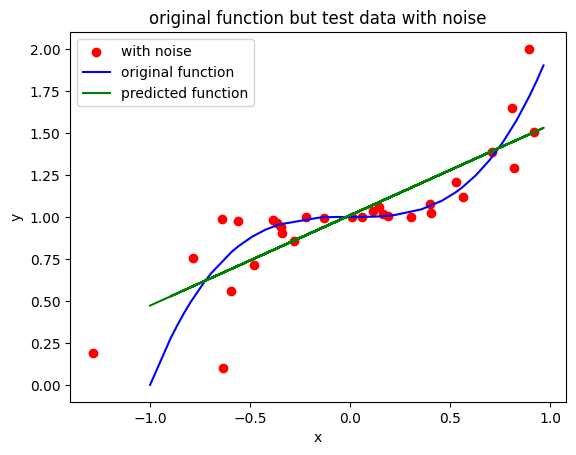

In [14]:
regr = LinearRegression().fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

y_predict = regr.predict(X_test.reshape(-1,1))

plt.scatter(X_train, y_train, color='red', label="with noise")
plt.plot(X_test_sorted, y_test_sorted, color='blue', label="original function")
plt.plot(X_test, y_predict, color='green', label="predicted function")
plt.title("original function but test data with noise")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

d) Perform a polynomial regression of n dimensions, and observe their plot on the original regression

           X         y
13 -1.287480  0.189912
4  -0.785374  0.753368
17 -0.643054  0.989303
11 -0.633615  0.098287
24 -0.597274  0.556308
[[ 1.         -1.        ]
 [ 1.         -0.89830508]
 [ 1.         -0.86440678]
 [ 1.         -0.83050847]
 [ 1.         -0.79661017]
 [ 1.         -0.72881356]
 [ 1.         -0.69491525]
 [ 1.         -0.59322034]
 [ 1.         -0.55932203]
 [ 1.         -0.49152542]
 [ 1.         -0.42372881]
 [ 1.         -0.3559322 ]
 [ 1.         -0.15254237]
 [ 1.         -0.08474576]
 [ 1.          0.01694915]
 [ 1.          0.05084746]
 [ 1.          0.11864407]
 [ 1.          0.15254237]
 [ 1.          0.22033898]
 [ 1.          0.3559322 ]
 [ 1.          0.45762712]
 [ 1.          0.52542373]
 [ 1.          0.55932203]
 [ 1.          0.62711864]
 [ 1.          0.69491525]
 [ 1.          0.76271186]
 [ 1.          0.83050847]
 [ 1.          0.89830508]
 [ 1.          0.93220339]
 [ 1.          0.96610169]]


AttributeError: Line2D.set() got an unexpected keyword argument 'columns'

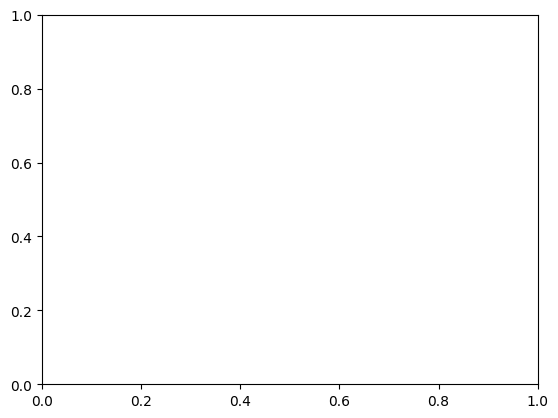

In [38]:
colour = ['green', 'navy', 'lightblue', 'black', 'purple']

# ds_sorted_train = pd.DataFrame({"X": X_train, 'y': y_train}, columns=['X', 'y'])
# ds_sorted_train = ds_sorted_train.sort_values(by=['X'])
# print(ds_sorted_train.head())

# ds_sorted_test = pd.DataFrame({"X": X_test, 'y': y_test}, columns=['X', 'y'])
# ds_sorted_test = ds_sorted_test.sort_values(by=['X'])

for i in range(1,5):
    # polynomial = PolynomialFeatures(degree=i)
    # X_train_polynomial = polynomial.fit_transform(ds_sorted_train["X"].to_numpy().reshape(-1,1), ds_sorted_train["y"].to_numpy().reshape(-1,1))
    # X_test_polynomial = polynomial.fit_transform(ds_sorted_test["X"].to_numpy().reshape(-1,1), ds_sorted_test["y"].to_numpy().reshape(-1,1))

    # # X_test_sorted = np.sort(X_test_polynomial)

    # regr = LinearRegression().fit(X_train_polynomial, ds_sorted_train["y"].to_numpy().reshape(-1,1))
    # y_predict = regr.predict(X_test_polynomial)
    # print(X_test_polynomial)

    mymodel = np.poly1d(np.polyfit(X_train, y_train, i))

    x_line = numpy.linspace(2, 95, 100)

    # y_predict = new_polynomial.predict(X_test.reshape(-1,1))
    plt.plot(x_line, mymodel, color=colour[i-1], columns=f"degree {i}")

plt.scatter(X_train, y_train, color='red', label="with noise")
plt.plot(X_test_sorted, y_test_sorted, color='blue', label="original function")

plt.title("polynomial fitting")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
    